In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

import warnings
warnings.filterwarnings("ignore")

In [91]:
def create_elips(p, a, b, alpha, x0, y0):
    x = a * np.cos(p) + x0
    y = b * np.sin(p) + y0
    x = x * np.cos(alpha) - y * np.sin(alpha)
    y = x * np.sin(alpha) + y * np.cos(alpha)
    return x, y

In [92]:
a_1 = 0.4
b_1 = 0.15
alpha_1 = np.pi / 6
x0_1 = - 0.1
y0_1 = 0.15

a_2 = 0.7
b_2 = 0.5
alpha_2 = - np.pi / 3
x0_2 = 0
y0_2 = 0

a_3 = 1
b_3 = 1
alpha_3 = 0
x0_3 = 0
y0_3 = 0

In [93]:
step = 0.025
points = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

class1_points = np.random.permutation(points)[:60]
class2_points = np.random.permutation(points)[:100]
class3_points = np.random.permutation(points)[:120]

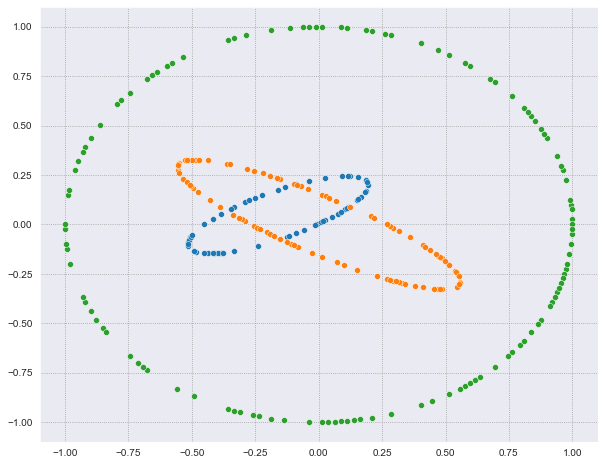

In [94]:
x1, y1 = create_elips(class1_points, a_1, b_1, alpha_1, x0_1, y0_1)
x2, y2 = create_elips(class2_points, a_2, b_2, alpha_2, x0_2, y0_2)
x3, y3 = create_elips(class3_points, a_3, b_3, alpha_3, x0_3, y0_3)

plt.figure(figsize=(10,8))

sns.scatterplot(x = x1, y = y1)
sns.scatterplot(x = x2, y = y2)
sns.scatterplot(x = x3, y = y3)

plt.show()

In [95]:
from sklearn.model_selection import train_test_split

feature1 = np.concatenate((x1[:, np.newaxis], y1[:, np.newaxis]), axis = 1)
label1 = np.full(len(feature1), 0)

feature2 = np.concatenate((x2[:, np.newaxis], y2[:, np.newaxis]), axis = 1)
label2 = np.full(len(feature2), 1)

feature3 = np.concatenate((x3[:, np.newaxis], y3[:, np.newaxis]), axis = 1)
label3 = np.full(len(feature3), 2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(feature1, label1, test_size=0.2, random_state=1, stratify=label1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature2, label2, test_size=0.2, random_state=1, stratify=label2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(feature3, label3, test_size=0.2, random_state=1, stratify=label3)


X_train = np.concatenate((X_train1, X_train2, X_train3), axis = 0)
y_train = np.concatenate((y_train1, y_train2, y_train3), axis = 0)

X_test = np.concatenate((X_test1, X_test2, X_test3), axis = 0)
y_test = np.concatenate((y_test1, y_test2, y_test3), axis = 0)

print('train shape: ', X_train.shape, y_train.shape)
print('test shape: ', X_test.shape, y_test.shape)

train shape:  (224, 2) (224,)
test shape:  (56, 2) (56,)


# Задание 1 PNN

## Spread = 0.3

In [96]:
from neupy.algorithms import PNN

model = PNN(std=0.3)
print(model)

PNN(batch_size=128, verbose=False, step=0.1, show_epoch=1, shuffle_data=False, epoch_end_signal=None, train_end_signal=None, std=0.3)


In [97]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
print(f'Train Accuracy of the model: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy of the model: {accuracy_score(y_test, y_test_pred)}')

Train Accuracy of the model: 0.875
Test Accuracy of the model: 0.875


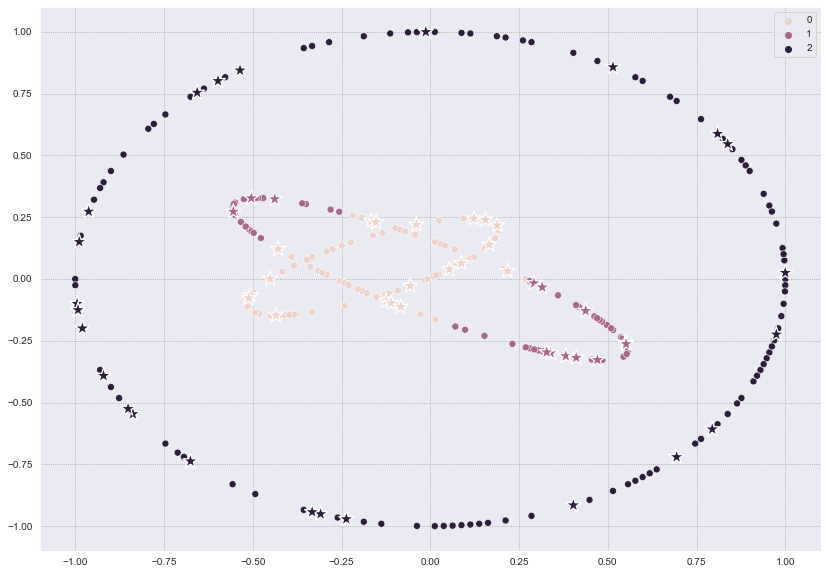

In [99]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train_pred, s=50)
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test_pred, marker = '*', s=250, legend= False)
plt.show()

In [100]:
def plot_decision_bounds(model):
    plt.figure(figsize=(14,10))
    
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
    out = model.predict(np.concatenate((xx.ravel()[:,np.newaxis], yy.ravel()[:,np.newaxis]), axis = 1))
    
    sns.scatterplot(x = xx.ravel(), y = yy.ravel(), c = out, cmap= 'Set2')
    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))

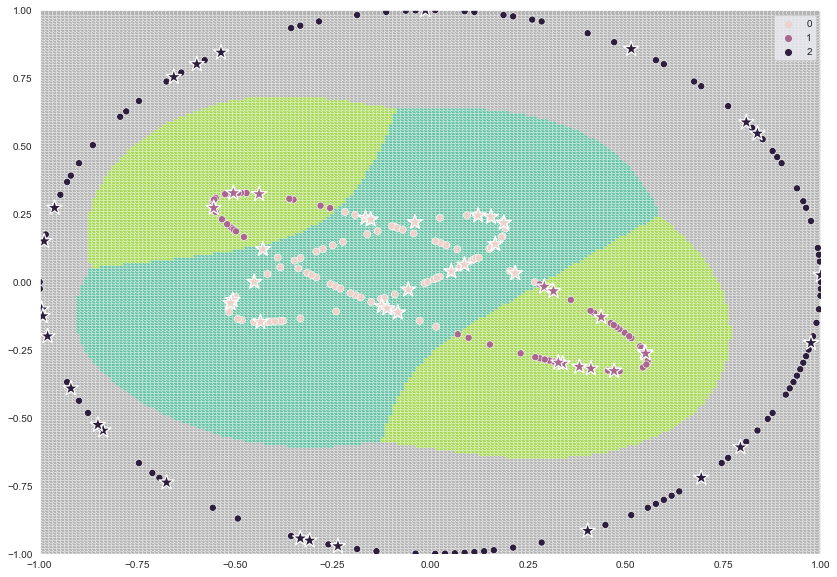

In [101]:
plot_decision_bounds(model)
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train_pred, s=50)
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test_pred, marker = '*', s=250, legend= False)
plt.show()

## Spread = 0.1

In [102]:
from neupy.algorithms import PNN

model = PNN(std=0.1)
print(model)

PNN(batch_size=128, verbose=False, step=0.1, show_epoch=1, shuffle_data=False, epoch_end_signal=None, train_end_signal=None, std=0.1)


In [103]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
print(f'Train Accuracy of the model: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy of the model: {accuracy_score(y_test, y_test_pred)}')

Train Accuracy of the model: 0.9508928571428571
Test Accuracy of the model: 0.8571428571428571


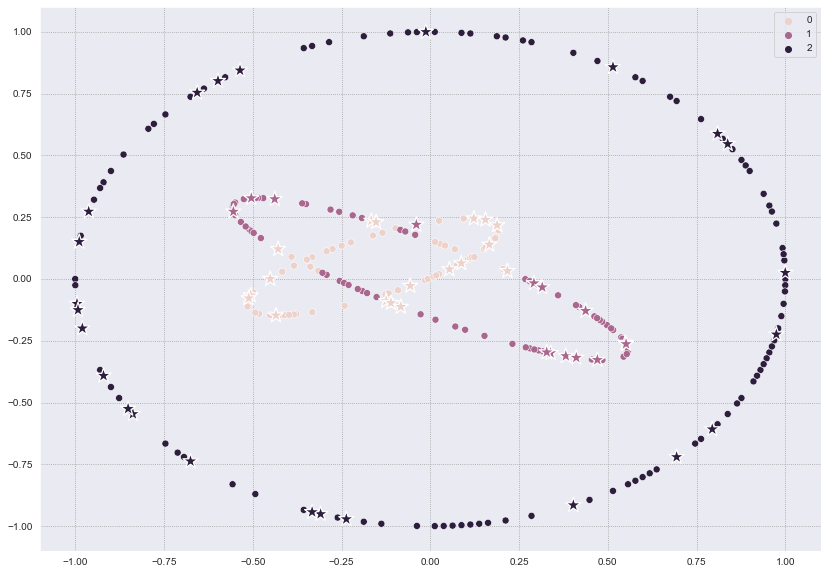

In [105]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train_pred, s=50)
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test_pred, marker = '*', s=250, legend= False)
plt.show()

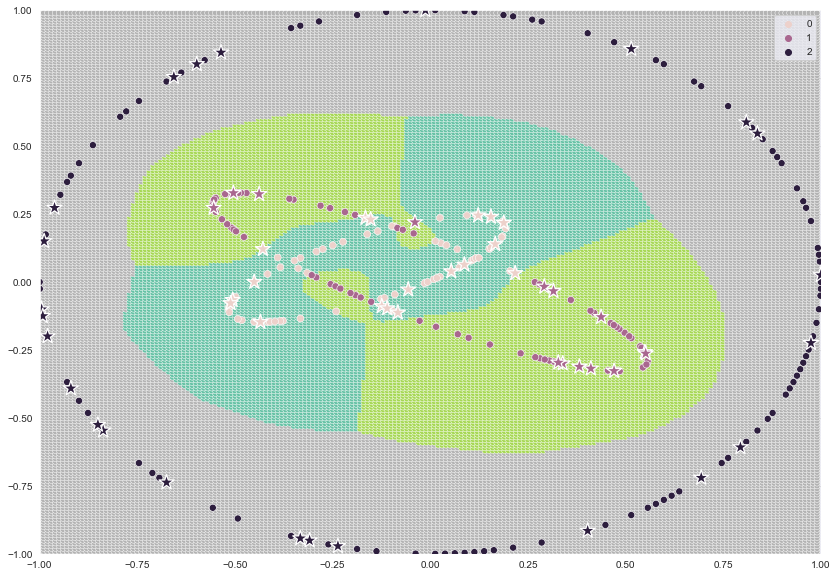

In [106]:
plot_decision_bounds(model)
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train_pred, s=50)
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test_pred, marker = '*', s=250, legend= False)
plt.show()

# Задание 2 RBF

In [107]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=10, class_weight='balanced', tol= 1e-5)
print(model)

SVC(class_weight='balanced', gamma=10, tol=1e-05)


In [108]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score
print(f'Train Accuracy of the model: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy of the model: {accuracy_score(y_test, y_test_pred)}')

Train Accuracy of the model: 0.8928571428571429
Test Accuracy of the model: 0.875


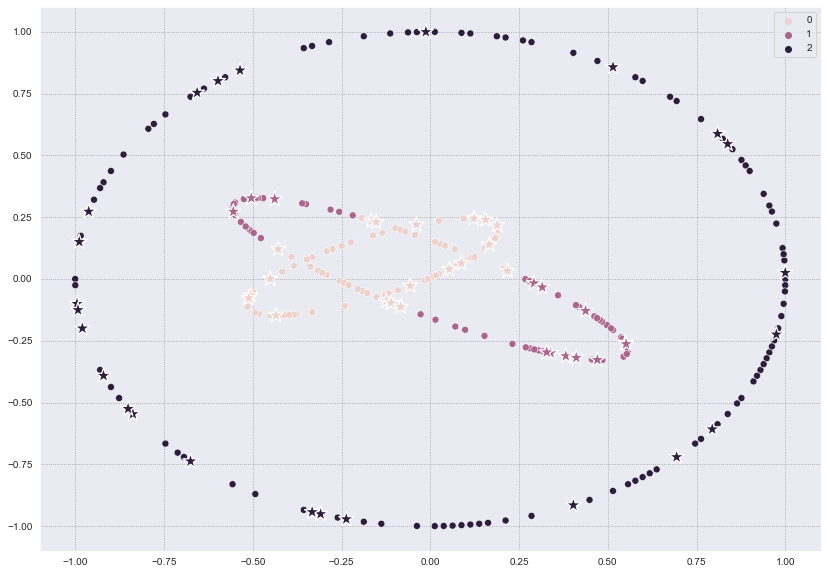

In [110]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train_pred, s=50)
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test_pred, marker = '*', s=250, legend= False)
plt.show()

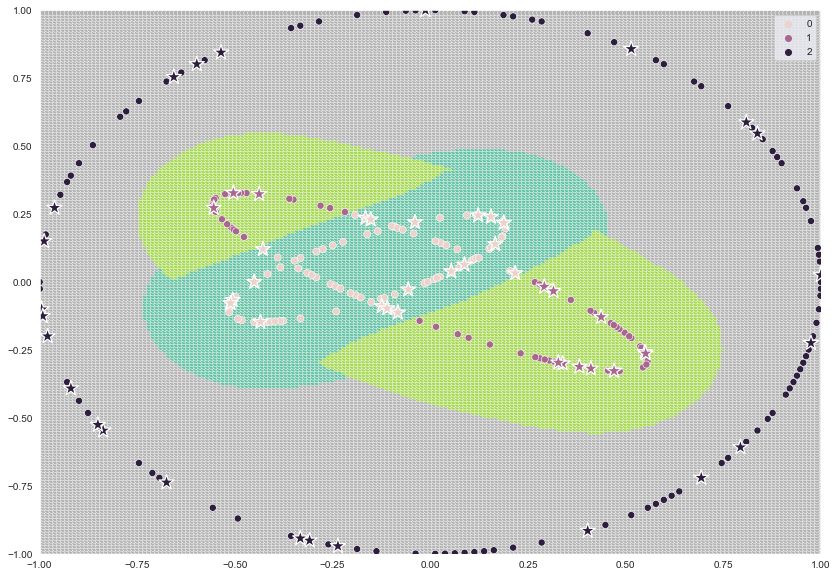

In [111]:
plot_decision_bounds(model)
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train_pred, s=50)
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test_pred, marker = '*', s=250, legend= False)
plt.show()

# Задание 3 GRNN

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def sko(y_true, y_pred):
    rmse = r2_score(y_true, y_pred)
    return (rmse / (y_true.max() - y_true.min())) * 100


def min_max_error(y_true, y_pred):
    diff = abs(y_true - y_pred)
    return diff.min(), diff.max()


def fraction_error(y_true, y_pred):
    return (abs(y_true - y_pred)) / y_true * 100

In [61]:
def f(x):
    return np.cos( -3 * x ** 2 + 5 * x + 10)

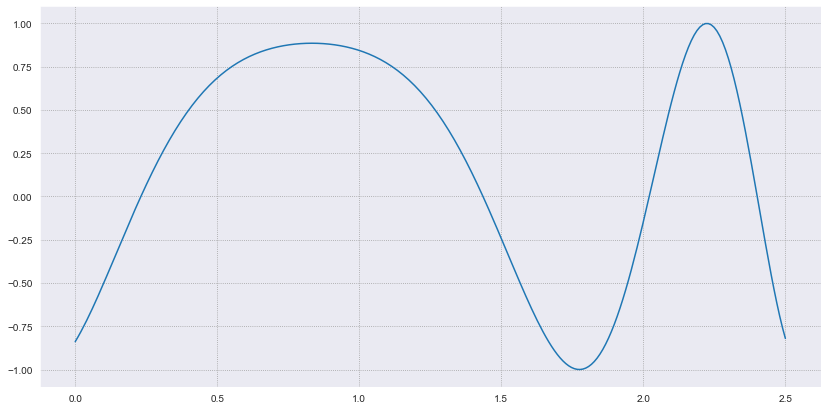

In [62]:
h = 0.01
X = np.linspace(0, 2.5, int(2.5/0.01), endpoint=True)
y = f(X)

plt.figure(figsize=(14,7))
sns.lineplot(x = X,  y = y)
plt.show()

## 10 процентов с конца на тест

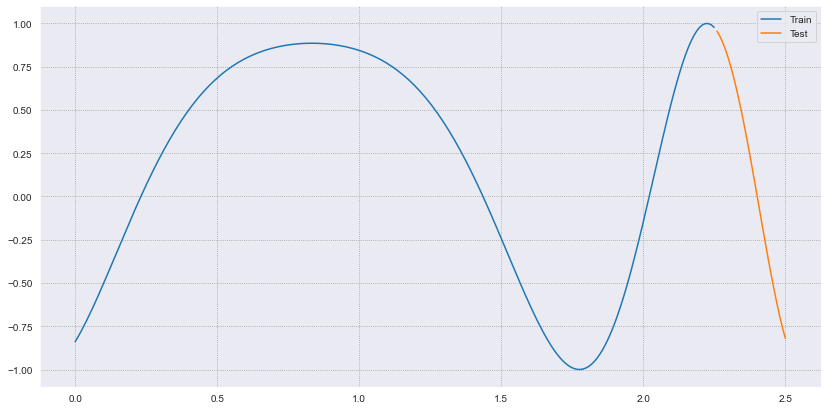

In [63]:
X = X[:,np.newaxis]
X_train = X[:int(0.9 * len(X))]
y_train = y[:int(0.9 * len(y))]
X_test = X[int(0.9 * len(X)):]
y_test = y[int(0.9 * len(y)):]

plt.figure(figsize=(14,7))
sns.lineplot(x = X_train[:,0],  y = y_train)
sns.lineplot(x = X_test[:,0],  y = y_val)
plt.legend(['Train', 'Test'])
plt.show()

In [64]:
from neupy.algorithms import GRNN

model = GRNN(std=h)
print(model)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=0.01)


In [65]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

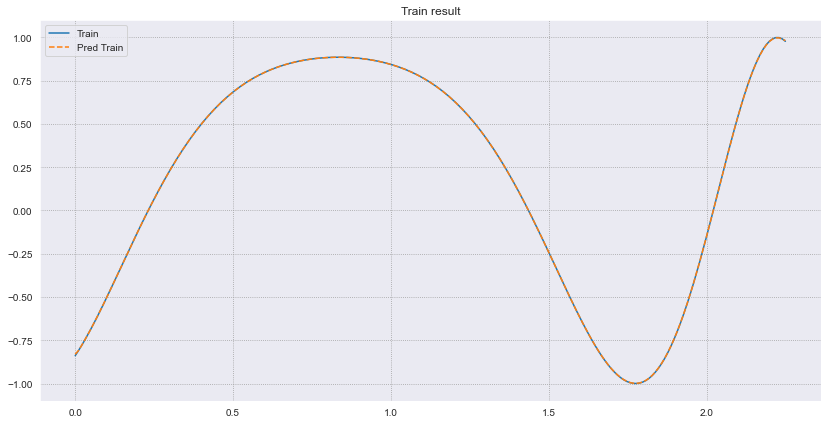

In [66]:
plt.figure(figsize=(14,7))
plt.title('Train result')

sns.lineplot(x = X_train[:,0],  y = y_train)
sns.lineplot(x = X_train[:,0],  y = y_train_pred[:,0], linestyle='--')

plt.legend(['Train', 'Pred Train'])
plt.show()

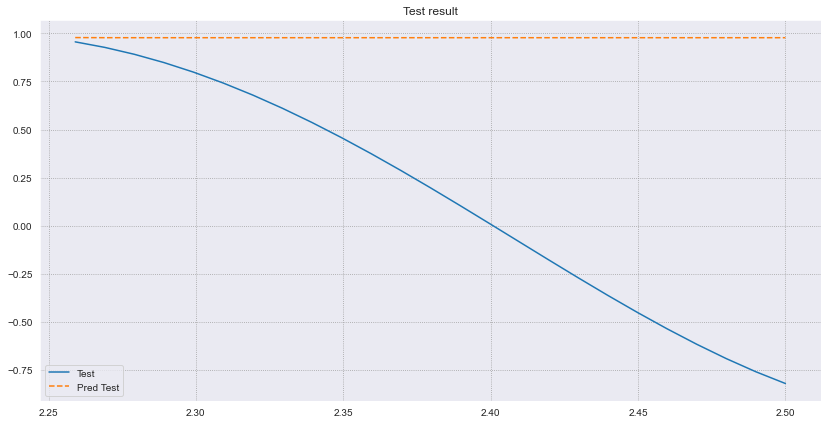

In [67]:
plt.figure(figsize=(14,7))
plt.title('Test result')

sns.lineplot(x = X_test[:,0],  y = y_test)
sns.lineplot(x = X_test[:,0],  y = y_test_pred[:,0], linestyle='--')

plt.legend(['Test', 'Pred Test'])
plt.show()

In [68]:
y_true = y_train
y_pred = y_train_pred[:, 0]

print(f'R2_score = {r2_score(y_true, y_pred)}')

print(f'MSE = {mean_squared_error(y_true, y_pred)}')

print(f'RMSE = {np.sqrt(mean_squared_error(y_true, y_pred))}')

print(f'Относительная СКО = {sko(y_true, y_pred)} %')

print(f'MAE = {mean_absolute_error(y_true, y_pred)}')

min_err, max_err = min_max_error(y_true, y_pred)
print(f'Min absolute error = {min_err}')
print(f'Max absolute error = {max_err}')

print(f'MAPE = {mean_absolute_percentage_error(y_true, y_pred)}')

frac = fraction_error(y_true, y_pred)
print(f'Доля с ошибкой менее 5% = {len(frac[frac <= 5]) / len(frac) * 100} %')
print(f'Доля с ошибкой 5 - 10 % = {len(frac[(frac > 5) & (frac <= 10)]) / len(frac) * 100} %')
print(f'Доля с ошибкой 10 - 20 % = {len(frac[(frac > 10) & (frac <= 20)]) / len(frac) * 100} %')
print(f'Доля с ошибкой 20 - 30 % = {len(frac[(frac > 20) & (frac <= 30)]) / len(frac) * 100} %')
print(f'Доля с ошибкой более 30 % = {len(frac[frac > 30]) / len(frac) * 100} %')

R2_score = 0.9999985665606287
MSE = 5.986815277740209e-07
RMSE = 0.0007737451310179734
Относительная СКО = 50.02321942226173 %
MAE = 0.00037080544843435593
Min absolute error = 8.281458242609396e-06
Max absolute error = 0.008188010337630613
MAPE = 0.002161705042652028
Доля с ошибкой менее 5% = 100.0 %
Доля с ошибкой 5 - 10 % = 0.0 %
Доля с ошибкой 10 - 20 % = 0.0 %
Доля с ошибкой 20 - 30 % = 0.0 %
Доля с ошибкой более 30 % = 0.0 %


## 20 процентов на тест, рыхлые данные

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('train shape: ', X_train.shape, y_train.shape)
print('test shape: ', X_test.shape, y_test.shape)

train shape:  (200, 1) (200,)
test shape:  (50, 1) (50,)


In [70]:
from neupy.algorithms import GRNN

model = GRNN(std=h)
print(model)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=0.01)


In [71]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

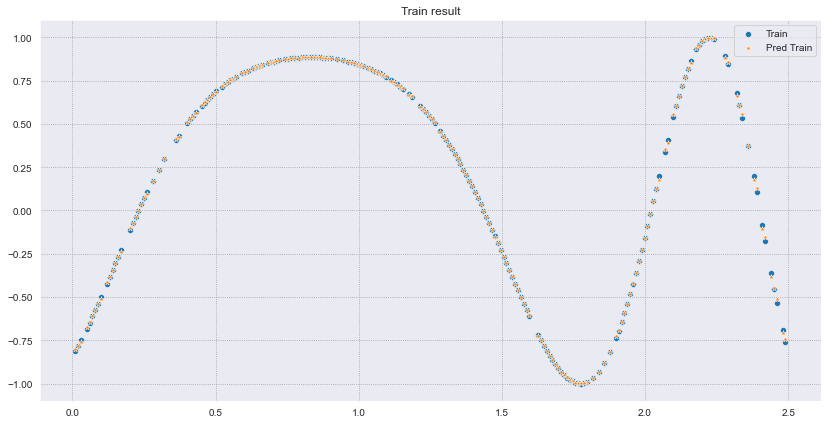

In [72]:
plt.figure(figsize=(14,7))
plt.title('Train result')

sns.scatterplot(x = X_train[:,0],  y = y_train)
sns.scatterplot(x = X_train[:,0],  y = y_train_pred[:,0], marker = '*')

plt.legend(['Train', 'Pred Train'])
plt.show()

In [74]:
y_true = y_train
y_pred = y_train_pred[:, 0]

print(f'R2_score = {r2_score(y_true, y_pred)}')

print(f'MSE = {mean_squared_error(y_true, y_pred)}')

print(f'RMSE = {np.sqrt(mean_squared_error(y_true, y_pred))}')

print(f'Относительная СКО = {sko(y_true, y_pred)} %')

print(f'MAE = {mean_absolute_error(y_true, y_pred)}')

min_err, max_err = min_max_error(y_true, y_pred)
print(f'Min absolute error = {min_err}')
print(f'Max absolute error = {max_err}')

print(f'MAPE = {mean_absolute_percentage_error(y_true, y_pred)}')

frac = fraction_error(y_true, y_pred)
print(f'Доля с ошибкой менее 5% = {len(frac[frac <= 5]) / len(frac) * 100} %')
print(f'Доля с ошибкой 5 - 10 % = {len(frac[(frac > 5) & (frac <= 10)]) / len(frac) * 100} %')
print(f'Доля с ошибкой 10 - 20 % = {len(frac[(frac > 10) & (frac <= 20)]) / len(frac) * 100} %')
print(f'Доля с ошибкой 20 - 30 % = {len(frac[(frac > 20) & (frac <= 30)]) / len(frac) * 100} %')
print(f'Доля с ошибкой более 30 % = {len(frac[frac > 30]) / len(frac) * 100} %')

R2_score = 0.9999081995237358
MSE = 3.755104626920621e-05
RMSE = 0.006127890849974909
Относительная СКО = 50.0186989656669 %
MAE = 0.002868056602284537
Min absolute error = 3.042803017661022e-06
Max absolute error = 0.02292715705445847
MAPE = 0.010922913671127214
Доля с ошибкой менее 5% = 98.0 %
Доля с ошибкой 5 - 10 % = 1.0 %
Доля с ошибкой 10 - 20 % = 0.5 %
Доля с ошибкой 20 - 30 % = 0.5 %
Доля с ошибкой более 30 % = 0.0 %


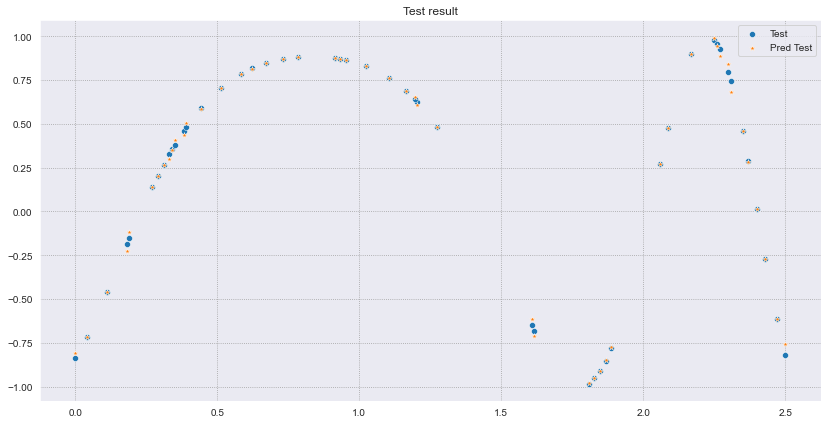

In [73]:
plt.figure(figsize=(14,7))
plt.title('Test result')

sns.scatterplot(x = X_test[:,0],  y = y_test)
sns.scatterplot(x = X_test[:,0],  y = y_test_pred[:,0], marker = '*')

plt.legend(['Test', 'Pred Test'])
plt.show()

In [75]:
y_true = y_test
y_pred = y_test_pred[:, 0]

print(f'R2_score = {r2_score(y_true, y_pred)}')

print(f'MSE = {mean_squared_error(y_true, y_pred)}')

print(f'RMSE = {np.sqrt(mean_squared_error(y_true, y_pred))}')

print(f'Относительная СКО = {sko(y_true, y_pred)} %')

print(f'MAE = {mean_absolute_error(y_true, y_pred)}')

min_err, max_err = min_max_error(y_true, y_pred)
print(f'Min absolute error = {min_err}')
print(f'Max absolute error = {max_err}')

print(f'MAPE = {mean_absolute_percentage_error(y_true, y_pred)}')

frac = fraction_error(y_true, y_pred)
print(f'Доля с ошибкой менее 5% = {len(frac[frac <= 5]) / len(frac) * 100} %')
print(f'Доля с ошибкой 5 - 10 % = {len(frac[(frac > 5) & (frac <= 10)]) / len(frac) * 100} %')
print(f'Доля с ошибкой 10 - 20 % = {len(frac[(frac > 10) & (frac <= 20)]) / len(frac) * 100} %')
print(f'Доля с ошибкой 20 - 30 % = {len(frac[(frac > 20) & (frac <= 30)]) / len(frac) * 100} %')
print(f'Доля с ошибкой более 30 % = {len(frac[frac > 30]) / len(frac) * 100} %')

R2_score = 0.999033916467415
MSE = 0.00039630245964563586
RMSE = 0.019907346876106718
Относительная СКО = 50.9666575999999 %
MAE = 0.011294382433107009
Min absolute error = 5.6650918317857624e-05
Max absolute error = 0.06439454138188194
MAPE = 0.025037732834889536
Доля с ошибкой менее 5% = 92.0 %
Доля с ошибкой 5 - 10 % = 8.0 %
Доля с ошибкой 10 - 20 % = 0.0 %
Доля с ошибкой 20 - 30 % = 0.0 %
Доля с ошибкой более 30 % = 0.0 %
